Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


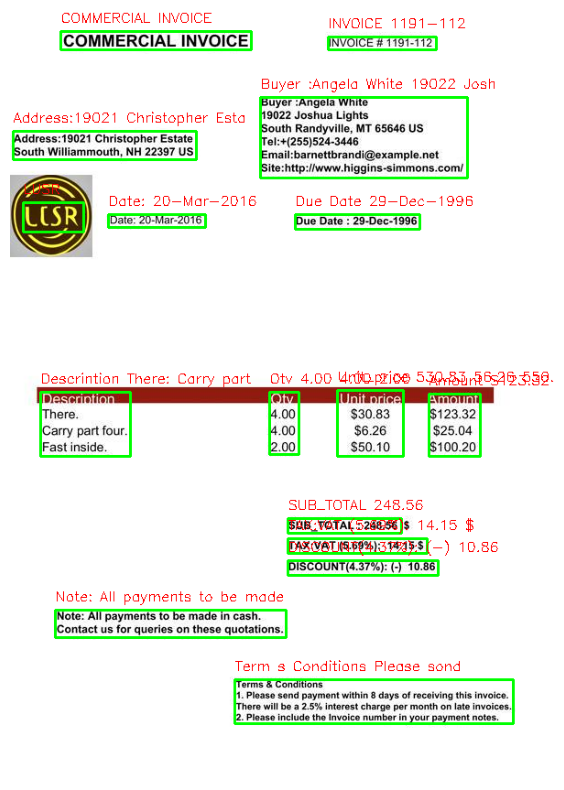

Image with adjusted bounding boxes saved to notebooks\test\adjusted_boxes_output_v6.jpg


In [ ]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'])

image_path = r'notebooks\invoices_dataset_final\images\Template39_Instance166.jpg'
results = reader.readtext(
    image_path,
    paragraph=True,
    decoder='wordbeamsearch',
    x_ths=0.8,
    y_ths=0.3 
)

image = cv2.imread(image_path)

for result in results:
    if len(result) == 2:
        bbox, text = result
        pts = [tuple(map(int, point)) for point in bbox]
        cv2.polylines(image, [np.array(pts)], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.putText(image, text[:30], (pts[0][0], pts[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

output_image_path = r"notebooks\test\adjusted_boxes_output_v6.jpg"
cv2.imwrite(output_image_path, image)
print(f"Image with adjusted bounding boxes saved to {output_image_path}")
